In [22]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ArunKumar237/datasets/main/adult.zip')

In [4]:
#replacing '?' with nan
df[df == '?'] = np.nan

In [7]:
# filling null values
for col in ['workclass', 'occupation', 'country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [51]:
df['salary'] = df['salary'].str.replace('<=50K', '0')
df['salary'] = df['salary'].str.replace('>50K', '1')
df['salary'] = df['salary'].astype('int')

<AxesSubplot: xlabel='salary', ylabel='count'>

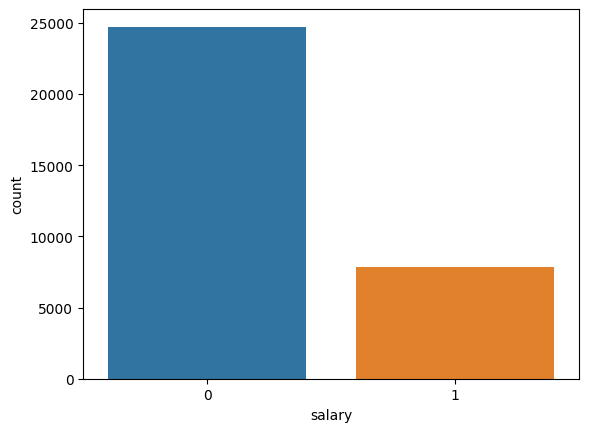

In [52]:
sns.countplot(x = df['salary'])

In [53]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 

df_majority = df[(df['salary']==0)] 
df_minority = df[(df['salary']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= df['salary'].value_counts().max(), # to match majority class
                                 random_state=42,
                                 )  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

<AxesSubplot: xlabel='salary', ylabel='count'>

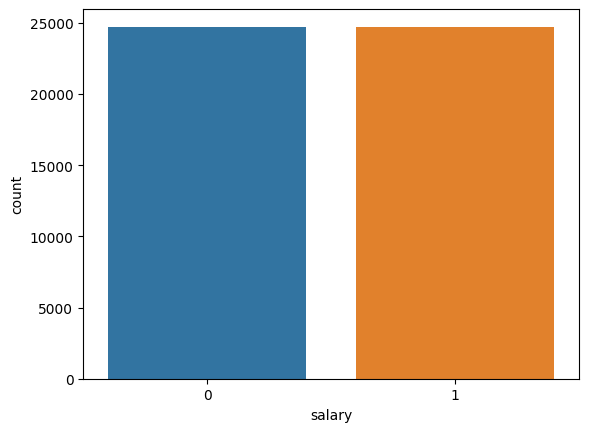

In [54]:
sns.countplot(x = df_upsampled['salary'])

In [61]:
categorical = []
for i in df_upsampled.columns:
    if df_upsampled[i].dtype == 'O' and i != 'salary':
        categorical.append(i)

In [60]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')

data = impute.fit_transform(df_upsampled)
data = pd.DataFrame(df_upsampled, columns=impute.feature_names_in_)

In [63]:
from sklearn.preprocessing import  LabelEncoder
binary_enc = LabelEncoder()
for i in categorical:
    data[i] = binary_enc.fit_transform(data[i])

In [69]:
X = data.drop(['salary'], axis=1)
y = data['salary']

In [70]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
30318,39,4,58343,15,10,2,7,0,4,1,0,0,40,39
31591,72,0,108796,14,15,2,0,0,4,1,0,0,40,39
3466,39,4,96452,12,14,2,4,0,4,1,0,0,55,39
22592,48,5,382242,10,16,2,4,5,4,0,0,0,40,39
21927,30,4,89625,15,10,2,10,5,1,0,0,0,5,39


In [10]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: salary, dtype: object

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=data['salary'])

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 30318 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             49440 non-null  int64
 1   workclass       49440 non-null  int32
 2   fnlwgt          49440 non-null  int64
 3   education       49440 non-null  int32
 4   education-num   49440 non-null  int64
 5   marital-status  49440 non-null  int32
 6   occupation      49440 non-null  int32
 7   relationship    49440 non-null  int32
 8   race            49440 non-null  int32
 9   sex             49440 non-null  int32
 10  capital-gain    49440 non-null  int64
 11  capital-loss    49440 non-null  int64
 12  hours-per-week  49440 non-null  int64
 13  country         49440 non-null  int32
 14  salary          49440 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 4.3 MB


In [74]:
#feature scaling

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [75]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,0.430677,0.058628,-0.158325,1.266408,-0.221896,-0.314901,1.486199,-0.737662,0.365669,0.608903,0.302693,-0.26174,-0.172823,0.285905
1,-0.886351,1.451755,0.732986,0.145730,-0.602800,-0.314901,-0.421685,-0.737662,0.365669,0.608903,-0.193625,-0.26174,2.313057,0.285905
2,0.508149,1.451755,-0.231721,0.145730,-0.602800,-0.314901,0.055286,-0.737662,0.365669,0.608903,0.505898,-0.26174,-0.172823,0.285905
3,1.670233,0.058628,-0.886569,0.145730,-0.602800,1.172615,-0.898656,-0.127362,0.365669,0.608903,-0.193625,-0.26174,-0.172823,0.285905
4,0.972982,0.058628,-0.090394,-0.414608,0.920818,-0.314901,-0.898656,-0.737662,0.365669,0.608903,-0.193625,-0.26174,-0.172823,0.285905


In [76]:
#PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.15789162, 0.09491389, 0.08857132, 0.08141247, 0.07557651,
       0.07486716, 0.06846555, 0.06528707, 0.06194874, 0.05919102,
       0.05550916, 0.04831941, 0.04534702, 0.02269905])

In [26]:
pca.explained_variance_ratio_

array([0.15147756, 0.10120111, 0.08981637, 0.08031092, 0.07645651,
       0.07343634, 0.06795913, 0.06683837, 0.06102867, 0.06000338,
       0.05358961, 0.04847832, 0.04182239, 0.0275813 ])

In [80]:
round(sum(list(pca.explained_variance_ratio_[:13]))*100)

98

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(max_depth= 10, max_features= 1.0, max_samples= 0.5, n_estimators= 100)

In [83]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=1.0, max_samples=0.5)

In [90]:
y_pred = rf.predict(X_train)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     19776
           1       0.85      0.94      0.89     19776

    accuracy                           0.89     39552
   macro avg       0.89      0.89      0.89     39552
weighted avg       0.89      0.89      0.89     39552



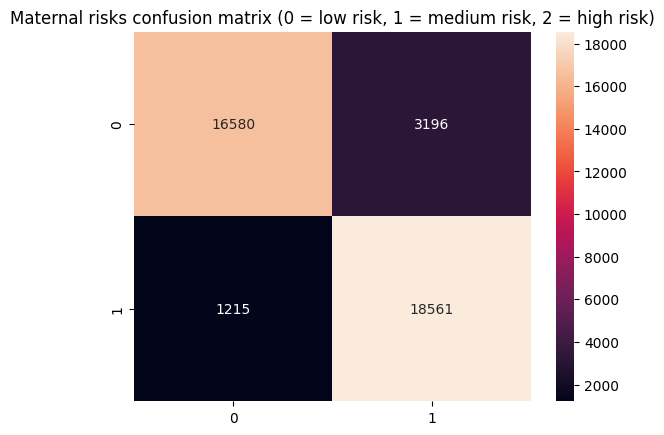

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_train,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.84      0.88     19776
           1       0.85      0.94      0.89     19776

    accuracy                           0.89     39552
   macro avg       0.89      0.89      0.89     39552
weighted avg       0.89      0.89      0.89     39552



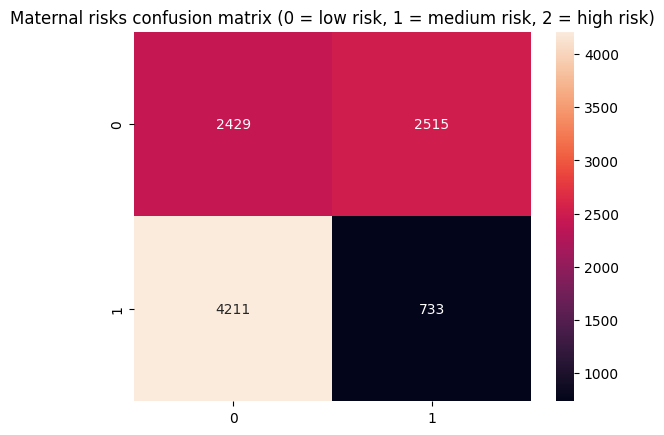

In [95]:
y_pred_test = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_train,y_pred))